In [69]:
def compress_image_with_svd(image_path: str,rate=0.8):
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage import io
    from matplotlib.font_manager import FontProperties

    # 加载
    image = io.imread(image_path)

    # 分离通道
    R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]

    # SVD 分解
    U_R, s_R, Vt_R = np.linalg.svd(R, full_matrices=False)
    U_G, s_G, Vt_G = np.linalg.svd(G, full_matrices=False)
    U_B, s_B, Vt_B = np.linalg.svd(B, full_matrices=False)

    m,n = image.shape[0],image.shape[1]
    
    # 计算奇异值的平方
    s_R_sq = s_R**2
    s_G_sq = s_G**2
    s_B_sq = s_B**2

    # 计算总能量
    total_energy_R = s_R_sq.sum()
    total_energy_G = s_G_sq.sum()
    total_energy_B = s_B_sq.sum()

    # 计算每个奇异值的贡献度
    contrib_R = s_R_sq / total_energy_R
    contrib_G = s_G_sq / total_energy_G
    contrib_B = s_B_sq / total_energy_B

    # 计算累计贡献度
    cum_contrib_R = np.cumsum(contrib_R)
    cum_contrib_G = np.cumsum(contrib_G)
    cum_contrib_B = np.cumsum(contrib_B)

    # 绘制累计贡献度曲线
    plt.figure(figsize=(10, 6))
    plt.plot(cum_contrib_R, label="Red Channel")
    plt.plot(cum_contrib_G, label="Green Channel")
    plt.plot(cum_contrib_B, label="Blue Channel")
    plt.xlim(0, 300)
    plt.xticks(np.arange(0, 301, 10))
    plt.xlabel("奇异值数量", fontproperties="SimHei")
    plt.ylabel("累计贡献率", fontproperties="SimHei")
    plt.title("每个频道增加单位奇异值数量的累计贡献率", fontproperties="SimHei")
    plt.legend()
    plt.show()

    # 奇异值数量
    Sigma = s_R + s_G + s_B
    k = 0
    for i in range(len(Sigma)):
        if np.sum(Sigma[:i]) / np.sum(Sigma) >= rate:
            k = i
            break

    # 重构图像
    R_reconstructed = np.dot(U_R[:, :k], np.dot(np.diag(s_R[:k]), Vt_R[:k, :]))
    G_reconstructed = np.dot(U_G[:, :k], np.dot(np.diag(s_G[:k]), Vt_G[:k, :]))
    B_reconstructed = np.dot(U_B[:, :k], np.dot(np.diag(s_B[:k]), Vt_B[:k, :]))

    # 合并通道
    reconstructed_image = np.stack(
        (R_reconstructed, G_reconstructed, B_reconstructed), axis=-1
    )

    # 归一化到[0, 1]
    for i in range(3):
        MAX = np.max(reconstructed_image[:, :, i])
        MIN = np.min(reconstructed_image[:, :, i])
        reconstructed_image[:, :, i] = (reconstructed_image[:, :, i] - MIN) / (
            MAX - MIN
        )

    # 调整到[0, 255]
    reconstructed_image = np.round(reconstructed_image * 255).astype("int")
    
    # 计算压缩率
    zip_rate = R.shape[0]*R.shape[1]/(R.shape[0]*k+k+k*R.shape[1])
    print("压缩率为：",zip_rate)

    # 显示
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("起始图像", fontproperties="SimHei")
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image)
    plt.title("使用" + str(k) + "个奇异值重构图像", fontproperties="SimHei")
    plt.show()


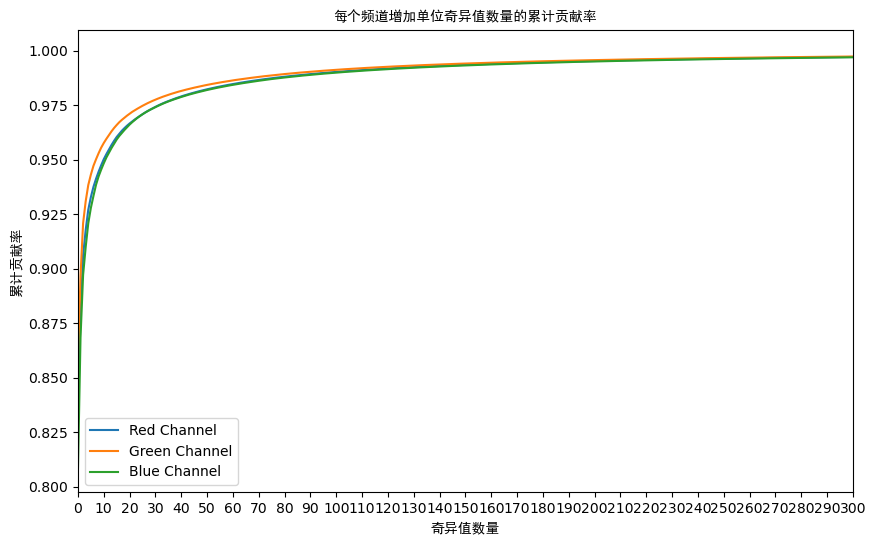

压缩率为： 14.391229946524064


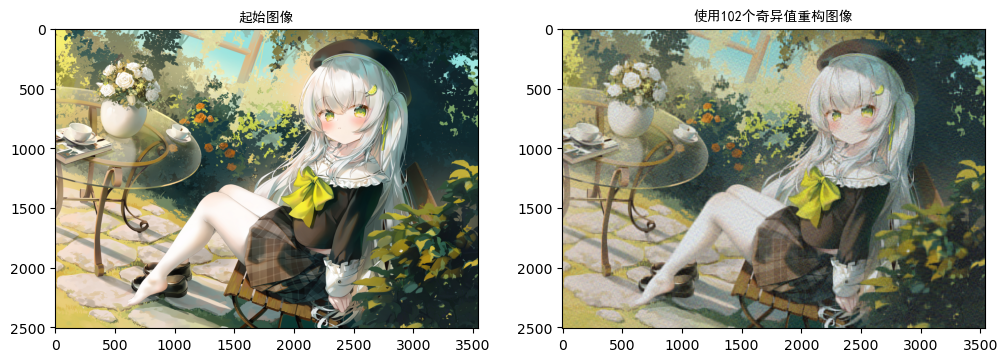

In [70]:
compress_image_with_svd("image1.jpg",0.55)